/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret

[2.137178238320232, 4.222734501995916, 4.531623425551245, 5.988219284851341, 4.165153274638146, 4.582407264329903, 4.879105581210328, 5.368801899850933, 4.8184964161676405, 4.64335572662478, 5.1395853851961055, 4.953890445103563, 5.42970276486088, 4.898430458840864, 4.3331701154301685, 4.892995993935478, 4.950866541397168, 5.735920757667638, 4.245921130079229, 4.880374743304235, 5.405605652934871, 5.591795105472623, 4.972066845350416]
[147.89786653953607, 249.66670013687448, 241.22856889488764, 230.03823428969915, 357.85486642700863, 368.52171577677876, 361.91821707628463, 352.2058881099617, 353.9472435201751, 360.6603618940756, 485.8863812053625, 487.14666944002494, 475.7138982740048, 473.6829445701646, 478.1306334421013, 475.1858468690754, 472.1557258012481, 591.4744029343029, 703.6129336086942, 605.7265734534188, 603.8130003389756, 601.1878868134671, 595.2147504903537]


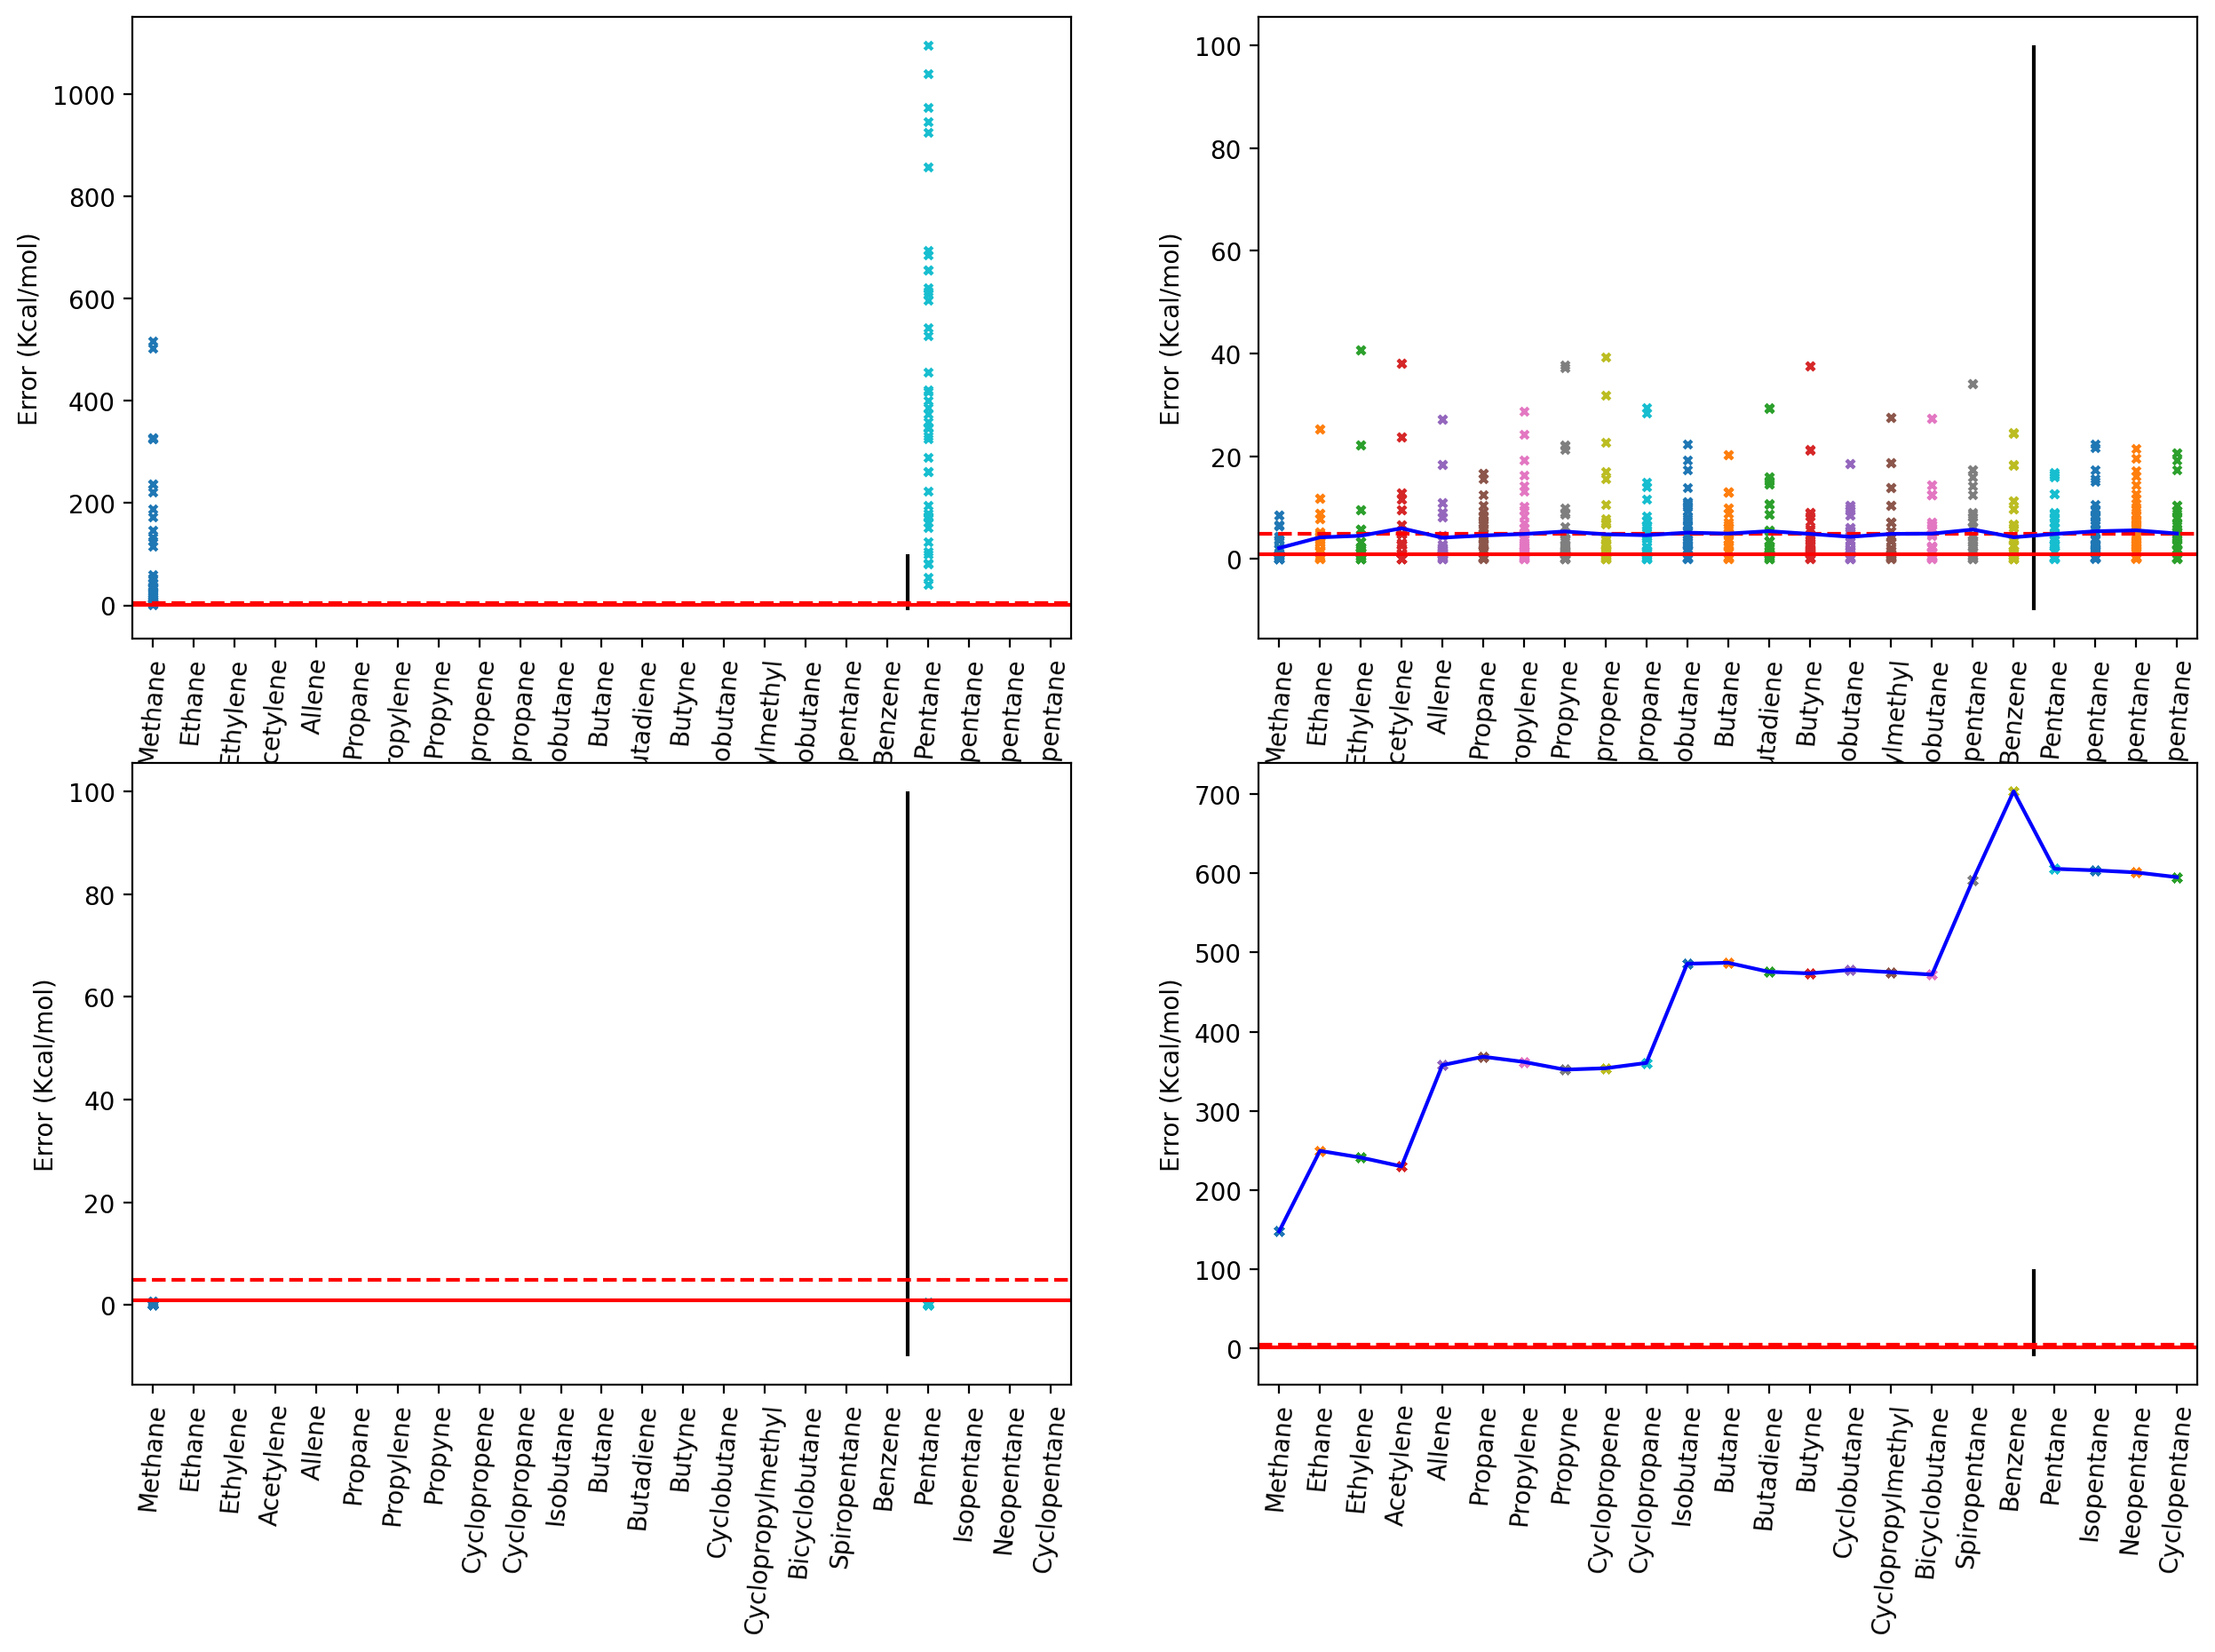

In [2]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    "Allene",
    "Propane",
    "Propylene",
    "Propyne",
    "Cyclopropene",
    "Cyclopropane",
    "Isobutane",
    "Butane",
    "Butadiene",
    "Butyne",
    "Cyclobutane",
    "Cyclopropylmethyl",
    "Bicyclobutane",
    "Spiropentane",
    "Benzene",
]
EVAL_STR_DICT = [
    "Pentane",
    "Isopentane",
    "Neopentane",
    "Cyclopentane",
    # "Hexane",
]

f, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(2, 2)


# name_dir = "cc-5-800"
# load_path = Path("validate") / name_dir
list_of_path = list(Path("validate/").glob("validate-*"))
load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)

list_of_path_dft = list(Path("validate/").glob("dft"))
load_path_dft = max(list_of_path_dft, key=lambda p: p.stat().st_ctime)


for i_row in range(2):

    error_l = []
    data = pd.read_csv(load_path / "train.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_np = data.filter(regex=(f"{i_name}.*")).to_numpy()[i_row, :]
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 0].scatter(
            i + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    i += 1
    axes[i_row, 0].vlines(i - 0.5, -10, 100, "k")
    axes[i_row, 0].hlines(1, -0.5, 100 - 0.5, "r")
    axes[i_row, 0].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path / "eval.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_np = data.filter(regex=(f"{j_name}.*")).to_numpy()[i_row, :]
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 0].scatter(
            i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    axes[i_row, 0].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )

    axes[i_row, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")

    ## DFT
    error_l = []
    data = pd.read_csv(load_path_dft / "train_dft.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_eq = data.filter(regex=(f"{i_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (
            data.filter(regex=(f"{i_name}.*")).to_numpy()[i_row, :] - data_eq
        )
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 1].scatter(
            i + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    i += 1
    axes[i_row, 1].vlines(i - 0.5, -10, 100, "k")
    axes[i_row, 1].hlines(1, -0.5, 100 - 0.5, "r")
    axes[i_row, 1].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path_dft / "eval_dft.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_eq = data.filter(regex=(f"{j_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (
            data.filter(regex=(f"{j_name}.*")).to_numpy()[i_row, :] - data_eq
        )
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 1].scatter(
            i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    axes[i_row, 1].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )
    print(error_l)
    axes[i_row, 1].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")

    # axes[i_row, 0].set_ylim(-5, 50)
    axes[i_row, 0].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    axes[i_row, 0].set_ylabel("Error (Kcal/mol)")
    # axes[i_row, 1].set_ylim(-5, 50)
    axes[i_row, 1].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    axes[i_row, 1].set_ylabel("Error (Kcal/mol)")
# plt.savefig(
#     f"./manu/figures/energy-{name_dir}-{datetime.datetime.today():%Y-%m-%d-%H-%M-%S}.pdf",
#     bbox_inches="tight",
# )

In [1]:
import numpy as np
# print(np.linspace(-0.49, 0.49, 8))
print(np.linspace(-0.5, 0.5, 51))
print(np.linspace(-0.5, 0.0, 26))
print(np.linspace(0.02, 0.5, 25))

# -0.25*2 +0.08333333

[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2
  0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44
  0.46  0.48  0.5 ]
[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.  ]
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5 ]


In [11]:
(np.abs(np.linspace(-0.25, 0.25, 4) - 0) < 1e-4).any()

False